In [1]:
import numpy as np

In [2]:
import chardet
with open('tripadvisor_hotel_reviews.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'windows-1251', 'confidence': 0.99, 'language': 'Russian'}

In [3]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv', encoding='windows-1251')
df.head

<bound method NDFrame.head of     selection1_name,"selection1_selection2_name","selection1_selection2_selection3","selection1_selection2_selection3_url"
0    Глэмпинг Доброе,"Плюсы: Очень красивая заповед...                                                                    
1    Глэмпинг Доброе,"Ездили в глэмпинг Доброе комп...                                                                    
2    Глэмпинг Доброе,"Из плюсов: красивая заповедна...                                                                    
3    Глэмпинг Доброе,"Красиво, дикая природа с идеа...                                                                    
4    Глэмпинг Доброе,"Все отлично, но с газом надо ...                                                                    
..                                                 ...                                                                    
100  Eko-camping SFERA,"Сама по себе идея вообще ог...                                                       

In [4]:
df.rename(columns = {'selection1_name,"selection1_selection2_name","selection1_selection2_selection3","selection1_selection2_selection3_url"': 'reviews'}, inplace = True)
df

,reviews
0,"Глэмпинг Доброе,""Плюсы: Очень красивая заповед..."
1,"Глэмпинг Доброе,""Ездили в глэмпинг Доброе комп..."
2,"Глэмпинг Доброе,""Из плюсов: красивая заповедна..."
3,"Глэмпинг Доброе,""Красиво, дикая природа с идеа..."
4,"Глэмпинг Доброе,""Все отлично, но с газом надо ..."
...,...
100,"Eko-camping SFERA,""Сама по себе идея вообще ог..."
101,"Eko-camping SFERA,""При заселении проводили нас..."
102,"Eko-camping SFERA,""эко кемпинг SFERA - купол п..."
103,"СПА ЛЕС глэмпинг,"""","""","""""


In [5]:
places = []
reviews = []

for element in range(df.size):
    place = df['reviews'][element].split('"')[0]
    review = df['reviews'][element].split('"')[1]
    places.append(place)
    reviews.append(review)
    
df = pd.DataFrame({'places': places, 'reviews':reviews})
df

,places,reviews
0,"Глэмпинг Доброе,","Плюсы: Очень красивая заповедная зона, просыпа..."
1,"Глэмпинг Доброе,",Ездили в глэмпинг Доброе компанией в конце апр...
2,"Глэмпинг Доброе,","Из плюсов: красивая заповедная зона, потрясающ..."
3,"Глэмпинг Доброе,","Красиво, дикая природа с идеальным комфортом, ..."
4,"Глэмпинг Доброе,","Все отлично, но с газом надо что то делать. Мо..."
...,...,...
100,"Eko-camping SFERA,",Сама по себе идея вообще огонь (если говорить ...
101,"Eko-camping SFERA,",При заселении проводили нас в наш геокупол #1 ...
102,"Eko-camping SFERA,",эко кемпинг SFERA - купол плюсы - красивая при...
103,"СПА ЛЕС глэмпинг,",


In [6]:
df1 = df.copy()
places1 = []
data = {}

for row in range(len(df1.index)):
    if df1.iat[row, 0] not in places1:
        places1.append(df1.iat[row, 0])
        df2 = df1[df1['places'] == df1.iat[row, 0]]
#         print(df2)
        tem = []
        for i in range(len(df2.index)):
            tem.append(df2.iat[i, 1].lower())
        data[df1.iat[row, 0]] = tem

reviews1 = []*len(places1)

for i in range(len(places1)):
    reviews1.append(data[places1[i]])
#     reviews1[i] = ' '.join(reviews1[i])

In [7]:
new = pd.DataFrame({'places': places1, 'collected_reviews': reviews1})
new

,places,collected_reviews
0,"Глэмпинг Доброе,","[плюсы: очень красивая заповедная зона, просып..."
1,"Глэмпинг на озере Сиг,",[отдыхала одна с двумя детьми. очень повезло с...
2,"Глэмпинг Видно Озеро,","[забронировал проживание в глэмпинге , случайн..."
3,"Глэмпинг Vezzika,",[плюсы: - хорошее и красивое местоположение ми...
4,"ЛЕС Глэмпинг и спа,","[решили мы посетить это чудесное место , забро..."
5,"Глэмпинг NewCamp,","[глэмпинг находится близ посёлка эссойла, в со..."
6,"Urman Camp Глэмпинг,",[приехали в глэмпинг к 5 попросили заранее зат...
7,"Велна Эко Спа Резорт,","[мне есть с чем сравнивать, поэтому посетив за..."
8,"Глэмпинг Под небом,","[отличные условия проживания, очень отзывчивый..."
9,"Гуляй-Город,",[приехали сегодня после дороги и музея в серпу...


## Cleaning data

In [31]:
!pip install regex

In [16]:
import re
import string

In [17]:
import nltk
import pymorphy2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [34]:
stop = stopwords.words('russian')
stop.remove('хорошо')
stop.append('это')
stop.append('место')
stop.append('персонал')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocessing(review):
    
    # data cleaning
    review = review.lower()
    review = re.sub(r'((www.\.\[^\s]+)|(https?://[^\s]+))', r'', review)
    review = re.sub(r'@[^\s]+', r'', review)
    review = re.sub(r'\W*\b\w{1,3}\b', r'', review)
    
#     for word in review:
#         word = re.sub(r'((www.\.\[^\s]+)|(https?://[^\s]+))', r'', word)
#         word = re.sub(r'@[^\s]+', r'', word)
#         word = re.sub(r'\W*\b\w{1,3}\b', r'', word)
        
#     review = re.sub('\-\s\r\n\s{1,}|\-\s\r\n|\r\n', '', review) #deleting newlines and line-breaks
#     review = re.sub('[.,:;%©?*,!@#$%^&()\d]|[+=]|[[]|[]]|[/]|"|\s{2,}|-', ' ', review) #deleting symbols
    
    token = nltk.word_tokenize(review)
    
    review = [word for word in token if (word not in stop and word not in string.punctuation 
                                         and word != "' '" and word != "``" and word != "''" and word.isnumeric() == False) ]
    
    review = ' '.join(pymorphy2.MorphAnalyzer().parse(word)[0].normal_form for word in review)
#     review = [lemmatizer.lemmatize(word) for word in review]
#     review = ' '.join(review)
    
    return review 

In [31]:
def prepareOnePlaceReviews(reviews):
    for i in range(len(reviews)):
        reviews[i] = preprocessing(reviews[i])
    return reviews

In [32]:
new.iat[20,1]

['потрясающая локация, идеальное место, чтобы провести время в калининграде. приезжаем во второй раз, впервые были в 2019 году. глэмпинг - на территории заповедника со всеми вытекающими преимуществами, много живности, прекрасная природе и, конечно, море. думается, что с маленькими детьми может быть не очень комфортно, но это на усмотрение родителей. очень удобные кровати и сам шатер не уступает уровню хорошего отеля. цены - приятные, особенно после подмосковных глэмпингов. очень здорово, что можно вкусно поесть, на косе нормального кафе больше нет. полный комфорт, а если повезет с погодой, то отдых удастся на 1000%. спасибо сотрудникам глэмпинга за организацию прекрасного отдыха!',
 'само место чудесное, на лоне природы, рядом балтийское море с широчайшим и почти безлюдным пляжем. но как пишут многие, это не заслуга создателей так называемого ',
 'отдыхали с женой в этом красивом месте. ночью поют птицы, очень романтично и необыкновенно. первый раз отдыхали в подобном формате. как пишу

In [40]:
st = prepareOnePlaceReviews(new.iat[20,1])
st

['потрясать локация идеальный провести время калининград приезжать второй впервые глэмпинг территория заповедник весь вытекать преимущество живность прекрасный природа море думаться маленький ребёнок очень комфортно усмотрение родитель очень удобный кровать шатёр уступать уровень хороший отель цена приятный особенно подмосковный глэмпинг очень здорово вкусно поесть нормальный кафе полный комфорт повезти погода отдых удаться спасибо сотрудник глэмпинг организация прекрасный отдых',
 'чудесный лоно природа рядом балтийский море широкий безлюдный пляж писать многие заслуга создатель называть',
 'отдыхать жена красивый ночью петь птица очень романтично необыкновенно первый отдыхать подобный формат писать многие дороговатый согласиться полностью который подавать вообще никакой завтрак подавать очень долго холодное вечером заказать рыба пресный кислый рыба сухой слово невкусно долго вежливый весь парень усик девушка остальной натягивать улыбка видно рада девушка глаз рыба весь поведение пока

In [38]:
new['collected_reviews'] = new['collected_reviews'].apply(lambda reviews: prepareOnePlaceReviews(reviews))

In [47]:
new

,places,collected_reviews
0,"Глэмпинг Доброе,",[плюс очень красивый заповедный зона просыпать...
1,"Глэмпинг на озере Сиг,",[отдыхать один два ребёнок очень повезти погод...
2,"Глэмпинг Видно Озеро,","[забронировать проживание глэмпинг, случайно о..."
3,"Глэмпинг Vezzika,",[плюс хороший красивый местоположение минус ин...
4,"ЛЕС Глэмпинг и спа,",[решить посетить чудесный забронировать значит...
5,"Глэмпинг NewCamp,",[глэмпинг находиться близ посёлок эссойло сосн...
6,"Urman Camp Глэмпинг,",[приехать глэмпинг попросить заранее затопить ...
7,"Велна Эко Спа Резорт,",[сравнивать поэтому посетить загородный-отель ...
8,"Глэмпинг Под небом,",[отличный условие проживание очень отзывчивый ...
9,"Гуляй-Город,",[приехать сегодня дорога музей серпухов доброж...


In [48]:
new['collected_reviews'][0]

['плюс очень красивый заповедный зона просыпаться вид море засыпать волна пожалуй самый необычный отпуск вроде жить палатка минимальный набор необходимый комфортный пребывание идеальный вариант мечтать сходить поход палатка перспектива ходить туалет ёлка точно очень расслаблять помогать отдохнуть городской суета ярко минус готовый глэмпинг тяжело добраться неподготовленный человек добраться два способ пешком моторный лодка лодка стоить поездка конец сам глэмпинг причал деревянный помост поэтому лодка прийтись прыгать вода забираться лодка вода',
 'ездить глэмпинг добрый компания конец апрель поскольку апрель действительно выдаться холодный делать больший скидка этот место откинуть наш погодный невезение сильно разочаровать соотношение',
 'плюс красивый заповедный зона потрясать закат вкусный мидия блинчик завтрак очень приятный вежливый молодой человек который собственно приносить завтрак минус везде грязненький очень бросаться глаз жутко неудобный скрипучий кровать который спина болет

In [51]:
new.to_csv('ready.csv', index=False)

In [57]:
ready = pd.read_csv('ready.csv')
ready['collected_reviews'][0]

"['плюс очень красивый заповедный зона просыпаться вид море засыпать волна пожалуй самый необычный отпуск вроде жить палатка минимальный набор необходимый комфортный пребывание идеальный вариант мечтать сходить поход палатка перспектива ходить туалет ёлка точно очень расслаблять помогать отдохнуть городской суета ярко минус готовый глэмпинг тяжело добраться неподготовленный человек добраться два способ пешком моторный лодка лодка стоить поездка конец сам глэмпинг причал деревянный помост поэтому лодка прийтись прыгать вода забираться лодка вода', 'ездить глэмпинг добрый компания конец апрель поскольку апрель действительно выдаться холодный делать больший скидка этот место откинуть наш погодный невезение сильно разочаровать соотношение', 'плюс красивый заповедный зона потрясать закат вкусный мидия блинчик завтрак очень приятный вежливый молодой человек который собственно приносить завтрак минус везде грязненький очень бросаться глаз жутко неудобный скрипучий кровать который спина болеть

## Dostoevsky

In [409]:
!pip install dostoevsky

In [410]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [411]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [437]:
reviews2 = reviews1
result = model.predict(reviews2, k=2)

sentiment_list=[]

for sentiment in result:
    sentiment_list.append(sentiment)

    
neutral_list = []
negative_list = []
positive_list = []
    
for sentiment in sentiment_list:
    neutral = sentiment.get('neutral')
    negative = sentiment.get('negative')
    positive = sentiment.get('positive')
    if neutral is None:
        neutral_list.append(0)
    else:
        neutral_list.append(sentiment.get('neutral'))
    if negative is None:
        negative_list.append(0)
    else:
        negative_list.append(sentiment.get('negative'))
    if positive is None:
        positive_list.append(0)
    else:
        positive_list.append(sentiment.get('positive'))

new['positive'] = positive_list
new['negative'] = negative_list
new['neutral'] = neutral_list


In [445]:
overall = []
for i in range(30):
    mx = max(positive_list[i], negative_list[i], neutral_list[i])
    if mx == positive_list[i]:
        m = 1
#     elif mx == negative_list[i]:
#         m = -1
    else:
        m = 0
    overall.append(m)

In [446]:
new['mood'] = overall
new

,places,collected_reviews,positive,negative,neutral,mood
0,"Глэмпинг Доброе,",плюсы очень красивая заповедная зона просыпаеш...,0.256842,0.228166,0.000000,1
1,"Глэмпинг на озере Сиг,",отдыхала одна двумя детьми очень повезло погод...,0.000000,0.262852,0.320831,0
2,"Глэмпинг Видно Озеро,",забронировал проживание глэмпинге случайно ока...,0.000000,0.000000,0.554480,0
3,"Глэмпинг Vezzika,",плюсы хорошее красивое местоположение минусы и...,0.000000,0.239359,0.320831,0
4,"ЛЕС Глэмпинг и спа,",решили посетить чудесное место забронировали з...,0.000000,0.196836,0.507822,0
5,"Глэмпинг NewCamp,",глэмпинг находится близ посёлка эссойла соснов...,0.000000,0.196836,0.445540,0
6,"Urman Camp Глэмпинг,",приехали глэмпинг 5 попросили заранее затопить...,0.268951,0.182436,0.000000,1
7,"Велна Эко Спа Резорт,",сравнивать поэтому посетив загородный спа-отел...,0.320831,0.228166,0.000000,1
8,"Глэмпинг Под небом,",отличные условия проживания очень отзывчивый п...,0.212079,0.000000,0.281416,0
9,"Гуляй-Город,",приехали сегодня дороги музея серпухове доброж...,0.300756,0.000000,0.256842,1


## WordClouds

In [415]:
import matplotlib.pyplot as plt

### Positive wordcloud review

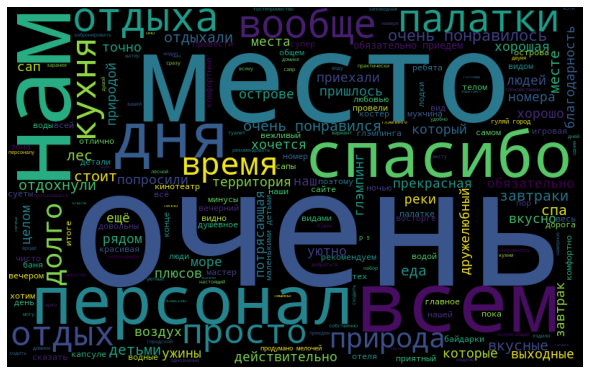

In [432]:
from wordcloud import WordCloud

words_list = new[new['positive']>0]['collected_reviews'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(width=800, height = 500, stopwords = stop).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Negative wordcloud review

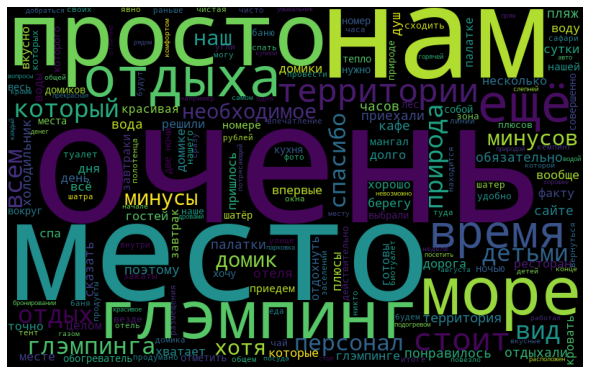

In [433]:
words_list = new[new['negative']>0]['collected_reviews'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(width=800, height = 500, stopwords = stop).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Neutral Wordcloud reviews

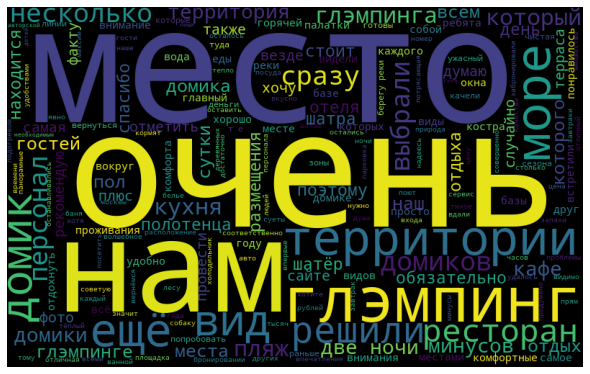

In [434]:
words_list = new[new['neutral']>0.35]['collected_reviews'].unique().tolist()
net_words = " ".join(words_list)

net_wordcloud =  WordCloud(width=800, height = 500, stopwords = stop).generate(net_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(net_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Vectorizing text

### Divide the data on train and test groups

In [451]:
from sklearn.model_selection import train_test_split
data = new.copy()
y = data['mood'].values
data.drop(['mood'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (21, 5) (21,)
Test data: (9, 5) (9,)


### BOW

In [469]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=7)

X_train_review_bow = vect.fit_transform(X_train['collected_reviews'])
X_test_review_bow = vect.transform(X_test['collected_reviews'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (21, 26)
X_test_review_bow shape:  (9, 26)


### TF-IDF

In [470]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=7)

X_train_review_tfidf = vectorizer.fit_transform(X_train['collected_reviews'])
X_test_review_tfidf = vectorizer.transform(X_test['collected_reviews'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (21, 26)
X_test_review_tfidf shape:  (9, 26)


## Building models

### Naive Buyes model 

In [471]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred)) 

Test Accuracy:  0.6666666666666666


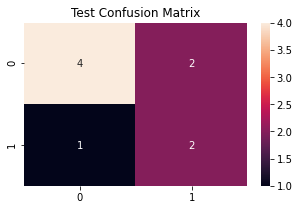

In [472]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

### Naive Buyes TF-IDF

In [473]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.6666666666666666


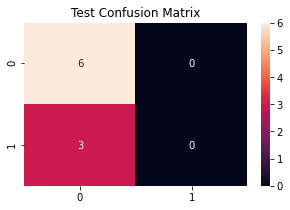

In [474]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

### Logistic regression TF-IDF

In [476]:
import warnings
warnings.filterwarnings('ignore')

In [478]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.7777777777777778


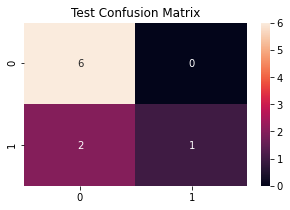

In [479]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

# Conclusion 

In [5]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['BOW', 'Naive Bayes', '66.7%'])
x.add_row(['TFIDF', 'Naive Bayes', '66.7%'])
x.add_row(['TFIDF', 'Logistic Regression', '77.8%'])
print(x)

+------------+---------------------+----------+
| Vectorizer |        Model        | Accuracy |
+------------+---------------------+----------+
|    BOW     |     Naive Bayes     |  66.7%   |
|   TFIDF    |     Naive Bayes     |  66.7%   |
|   TFIDF    | Logistic Regression |  77.8%   |
+------------+---------------------+----------+


## TextBlob: subjectivity, polarity and give it a score

In [384]:
!pip install textblob

In [385]:
from textblob import TextBlob

In [386]:
# def translate(text):
#     return TextBlob(text).translate(to='en')

reviews2 = []
# for i in range(len(reviews1)):
#     text1 = TextBlob(reviews1[i])
#     text = text1.translate(reviews1[i])
#     reviews2.append(text)
    
# new['translated_eng'] = new['collected_reviews'].apply(lambda text: translate(text))

text1 = TextBlob(new.iat[0,1])
lang = text1.translate(from_lang="ru", to="en")

In [388]:
new1 = new.copy()

In [390]:
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity
    
new1['subjectivity'] = new1['collected_reviews'].apply(getSubjectivity)
new1['polarity'] = new1['collected_reviews'].apply(getPolarity)
    
def analyse(score):
    if score == 0:
        return 'Neutral'
    if score < 0:
        return 'Negative'
    else:
        return 'Positive'
new1['final_result'] = new1['polarity'].apply(analyse)
    

In [391]:
new1

,places,collected_reviews,positive,negative,neutral,subjectivity,polarity,final_result
0,"Глэмпинг Доброе,",плюсы очень красивая заповедная зона просыпаеш...,0.256842,0.228166,0.000000,0.0,0.000,Neutral
1,"Глэмпинг на озере Сиг,",отдыхала одна двумя детьми очень повезло погод...,0.000000,0.262852,0.320831,0.0,0.000,Neutral
2,"Глэмпинг Видно Озеро,",забронировал проживание глэмпинге случайно ока...,0.000000,0.000000,0.554480,0.0,0.000,Neutral
3,"Глэмпинг Vezzika,",плюсы хорошее красивое местоположение минусы и...,0.000000,0.239359,0.320831,0.0,0.000,Neutral
4,"ЛЕС Глэмпинг и спа,",решили посетить это чудесное место забронирова...,0.000000,0.196836,0.507822,0.0,0.000,Neutral
5,"Глэмпинг NewCamp,",глэмпинг находится близ посёлка эссойла соснов...,0.000000,0.196836,0.445540,0.0,0.000,Neutral
6,"Urman Camp Глэмпинг,",приехали глэмпинг 5 попросили заранее затопить...,0.268951,0.182436,0.000000,0.0,0.000,Neutral
7,"Велна Эко Спа Резорт,",сравнивать поэтому посетив загородный спа-отел...,0.320831,0.228166,0.000000,0.0,0.000,Neutral
8,"Глэмпинг Под небом,",отличные условия проживания очень отзывчивый п...,0.212079,0.000000,0.281416,0.0,0.000,Neutral
9,"Гуляй-Город,",приехали сегодня дороги музея серпухове доброж...,0.300756,0.000000,0.256842,0.0,0.000,Neutral
